In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=data.target

In [5]:
d = df
x = d.drop(['target'],axis=1)
y = d['target']

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135]


Text(0, 0.5, 'Second principal component')

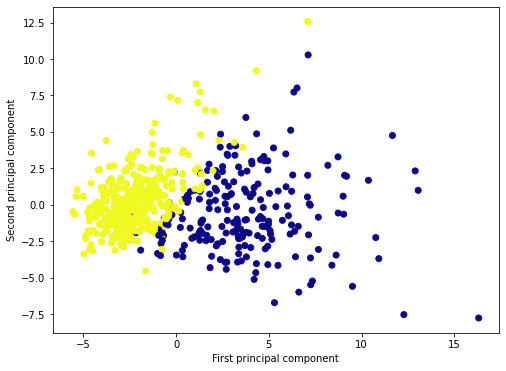

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=data['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')



In [10]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657548,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.23271589,  0.19720728,  0.13032157,  0.183848  ,  0.28009202,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853122,  0.06454986, -0.0093142 ,  0.02869953, -0.10429174,
        -0.07409157,  0.0027338 , -0.02556362, -0

In [11]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Logistic Regression

In [13]:
import time
start = time.time()
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score
from sklearn import metrics

model=LogisticRegression(random_state = 0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: %.3f" %accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print(y_pred)
end = time.time()
print(end - start)

Accuracy: 0.939
Precision: 0.905
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 1]
0.011358976364135742


K-Nearest Neighbor

In [16]:
import time
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
model=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: %.3f" %accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print(y_pred)
end = time.time()
print(end - start)

Accuracy: 0.930
Precision: 0.915
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1]
0.049981117248535156


Support Vector Classifier

In [15]:
import time
start = time.time()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
model=SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: %.3f" %accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print(y_pred)
end = time.time()
print(end - start)

Accuracy: 0.939
Precision: 0.941
[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1]
0.010303020477294922


Guassian Naive Bayes

In [17]:
import time
start = time.time()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
model=GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: %.3f" %accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print(y_pred)
end = time.time()
print(end - start)

Accuracy: 0.904
Precision: 0.924
[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1
 0 0 1]
0.0051212310791015625


Decision Tree

In [18]:
import time
start = time.time()
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
model=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: %.3f" %accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print(y_pred)
end = time.time()
print(end - start)

Accuracy: 0.930
Precision: 0.968
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1]
0.05881309509277344


Random Forest

In [19]:
import time
start = time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
model=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: %.3f" %accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print(y_pred)
end = time.time()
print(end - start)

Accuracy: 0.912
Precision: 0.952
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]
0.03599691390991211
